<a href="https://colab.research.google.com/github/jadamcneill/music-computing/blob/main/assignments/labAssignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import scipy.signal as sg

# import audio files
!git clone https://github.com/jcdevaney/musicComputing2025.git


fatal: destination path 'musicComputing2025' already exists and is not an empty directory.


In [36]:


def plotTimeFreq(sig,sr,title,winSize,specType,fig):

    # Adjust the x-axis to represent time
    time=np.arange(0,sig.shape[0])/sr

    # Scale the y-axis to represent amplitude from -1 to 1
    excursion=max(abs(sig))
    sigNew = sig / excursion

    # Label the x and y axes with variables
    xlabel = 'Time (seconds)'
    ylabel = 'Amplitude'

    # Create a new figure (using the figure number passed in as an argument)
    plt.figure(fig)

    # Create the first subplot
    plt.subplot(2,1,1)

    # Plot the time-domain representation of the inputted audio signal
    plt.plot(time,sigNew)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Create the second subplot
    plt.subplot(2,1,2)

    # Plot the frequency-domain representatio of the inputted audio signal
    spec = librosa.amplitude_to_db(np.abs(librosa.stft(sig,n_fft=winSize)), ref=np.max)
    librosa.display.specshow(spec, y_axis=specType)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show



In [37]:
def filterSignal(sig,sr,freq,filtType,order,winSize,specType,fig):

    # Inputs
    #   - signal to filter (sig)
    #   - sampling rate of the signal (sr)
    #   - filter frequency/frequencies (freq)
    #   - filter type (filtType)
    #   - order of the filter (order)
    #   - window size for the FFT (winSize)
    #   - type of spectrogram, log or linear (specType)
    #   - figure number (fig)

    # use an if/elif/else statement with ‘or’ tests to set up the parameters for the different   type of filter based on the code in filters.ipynb and or.ipynb, specifically
	  #   if the filter type is ‘low’ or ‘high’
		#       filterFreq = freq / (sr / 2)
	  #   if the filter type if ‘bandpass’ or ‘bandstop’
		#       filterFreq = [freq[0] / (sr / 2), freq[1] / (sr / 2)]

    #sig,sr,order,freq
    #if filtType== 'low' or 'high'
    if filtType== 'low' or filtType== 'high':
        filterFreq = freq / (sr / 2) # convert frequency to between 0 and 1
    elif filtType== 'bandpass' or filtType== 'bandstop':
        filterFreq = [freq[0] / (sr / 2), freq[1] / (sr / 2)] # convert frequency to between 0 and 1


    # design filter
    b,a = sg.butter(order,filterFreq,filtType)


    # run filter on signal
    sig_fil1 = sg.filtfilt(b,a,sig)


    plotTimeFreq(sig_fil1,sr,filtType,winSize,specType,fig)


    return sig_fil

    # create a filter using using sg.butter()

    b, a = sg.butter(order, filterFreq, filtType)


    # run the created filter on the inputting signal using sg.filtfilt()
    sig_fil1a = sg.filtfilt(b, a, sig)

    plotTimeFreq(sig_fil1a,sr,filtType,winSize,specType,fig)
    IPython.display.Audio(data=sig_fil1a, rate=sr)

    # plot the filtered signal with plotTimeFreq(), use filtType for title

    # return the filtered signal
    return sig_fil1a


In [38]:
def allFilters(sig,sr,freq,width,order,winSize,specType):

    # Inputs
    #   - signal to filter (sig)
    #   - sampling rate of the signal (sr)
    #   - filter frequency (freq)
    #   - distance between the low and high band frequencies (width)
    #   - order of the filter (order)
    #   - window size for the FFT (winSize)
    #   - type of spectrogram, log or linear (specType)

    # call filterSignal() to run a low-pass filter on the inputting signal using
    # the inputting filter frequency and filter order
    # set fig equal to 1


    order = 1
    filterFreq = 400 / (sr / 2) # convert frequency to between 0 and 1
    filtType = 'low'
    fig = 1
    sig_lp=filterSignal(sig,sr,freq,filtType,order,winSize,specType,fig)


    # call filterSignal() to run a high-pass filter on the inputting signal using
    # the inputting filter frequency and filter order
    order = 1
    filterFreq = 400 / (sr / 2) # convert frequency to between 0 and 1
    filtType = 'high'
    fig = 2
    sig_hp=filterSignal(sig,sr,freq,filtType,order,winSize,specType,fig)


    #call filterSignal() to run a band-pass filter on the inputting signal using
    # the inputting filter frequency and filter order – filter frequency will be
    # calculated using the inputted width parameter like this:
    #                   [freq-width,freq+width]
    # set fig equal to 3


    order = 1
    filterFreq = 400 / (sr / 2) # convert frequency to between 0 and 1
    filtType = 'bandpass'
    fig = 3
    sig_bp=filterSignal(sig,sr,freq,filtType,order,winSize,specType,fig)


    # call filterSignal() to run a band-stop filter on the inputting signal using
    # the inputting filter frequency and filter order – filter frequency will be
    # calculated using the inputted width parameter like this:
    #                   [freq-width,freq+width]
    # set fig equal to 4

    order = 1
    filterFreq = 400 / (sr / 2) # convert frequency to between 0 and 1
    filtType = 'bandstop'
    fig = 4
    sig_fs=filterSignal(sig,sr,freq,filtType,order,winSize,specType,fig)

    # return the output of the low-pass, high-pass, bandpass, and bandstop
    return sig_lp, sig_hp, sig_bp, sig_fs
    # filtered signals


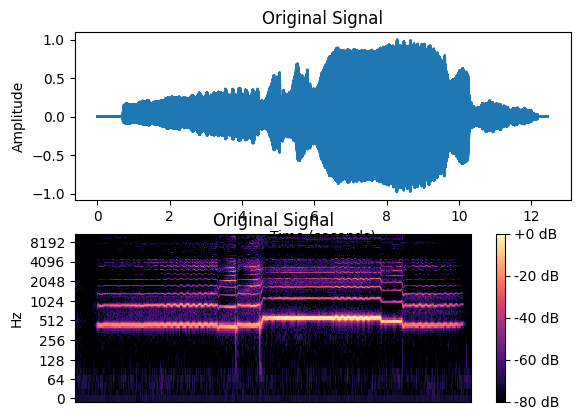

In [39]:
sig , sr = librosa.load('musicComputing2025/audioFiles/avm.wav')
winSize = 1024
specType = 'log'
fig = 1

# Plot original signal
plotTimeFreq(sig,sr,'Original Signal',winSize,specType,fig)

# Play original signal
IPython.display.Audio(data=sig, rate=sr)







In [10]:
freq = 600
freq = 600
width = 200
order = 4
freq = 600
freq = 600
width = 200
order = 4
# call allFilters() and save the output as sig_lp, sig_hp, sig_bp, sig_bs
def allFilters(sig,sr,freq,width,order,winSize,specType):
    order = 1
    filterFreq = 400 / (sr / 2) # convert frequency to between 0 and 1
    filtType = 'low'
    fig = 1
    sig_lp, sig_hp, sig_bp, sig_bs=allFilters(sig,sr,freq,width,order,winSize,specType)

In [30]:
# play the low-pass version of the signal with IPython.display.Audio()

def plotTimeFreq(sig,sr,title,winSize,specType,fig):


# order 1 has a rolloff of −6 dB per octave
# order 2 has a rolloff of −12 dB per octave
# order 3 has a rolloff of -18 dB per octave
# order 4 has a rolloff of −24 dB per octave


# import libraries
 import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import scipy.signal as sg

# import audio files
!git clone https://github.com/jcdevaney/musicComputing2025.git

sig, sr = librosa.load('musicComputing2025/audioFiles/avm.wav')
winSize = 1024
specType = 'log'

order = 4
filterFreq = 400 / (sr / 2) # convert frequency to between 0 and 1
filtType = 'low'
fig = 1

b, a = sg.butter(order, filterFreq, filtType)
sig_fil1b = sg.filtfilt(b, a, sig)

plotTimeFreq(sig_fil1b,sr,filtType,winSize,specType,fig)
IPython.display.Audio(data=sig_fil1b, rate=sr)


fatal: destination path 'musicComputing2025' already exists and is not an empty directory.


In [32]:
# play the high-pass version of the signal with IPython.display.Audio()

def plotTimeFreq(sig,sr,title,winSize,specType,fig):


 sig, sr = librosa.load('musicComputing2025/audioFiles/avm.wav')
winSize = 1024
specType = 'log'
order = 4
filterFreq = 800 / (sr / 2) # convert frequency to between 0 and 1
filtType = 'high'
fig = 1

b, a = sg.butter(order, filterFreq, filtType)
sig_fil2 = sg.filtfilt(b, a, sig)

plotTimeFreq(sig_fil2,sr,filtType,winSize,specType,fig)
IPython.display.Audio(data=sig_fil2, rate=sr)


In [34]:
# play the band-pass version of the signal with IPython.display.Audio()
def plotTimeFreq(sig,sr,title,winSize,specType,fig):


 sig, sr = librosa.load('musicComputing2025/audioFiles/avm.wav')
winSize = 1024
specType = 'log'
order = 4
filterFreq = [800 / (sr / 2), 1600 / (sr / 2)] # convert frequency to between 0 and 1
filtType = 'bandpass'
fig = 1

b, a = sg.butter(order, filterFreq, filtType)
sig_fil3 = sg.filtfilt(b, a, sig)

plotTimeFreq(sig_fil3,sr,filtType,winSize,specType,fig)
IPython.display.Audio(data=sig_fil3, rate=sr)



In [28]:
# play the band-stop version of the signal with IPython.display.Audio()

def plotTimeFreq(sig,sr,title,winSize,specType,fig):

 sig, sr = librosa.load('musicComputing2025/audioFiles/avm.wav')
winSize = 1024
specType = 'log'
order = 4
filterFreq = [800 / (sr / 2), 1600 / (sr / 2)] # convert frequency to between 0 and 1
filtType = 'bandstop'
fig = 1

b, a = sg.butter(order, filterFreq, filtType)
sig_fil4 = sg.filtfilt(b, a, sig)

plotTimeFreq(sig_fil4,sr,filtType,winSize,specType,fig)
IPython.display.Audio(data=sig_fil4, rate=sr)

